In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cPickle as pickle
from mpl_toolkits.mplot3d import Axes3D
import plotly.plotly as py
from plotly.graph_objs import *
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy as sp
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import FactorAnalysis
from sklearn import preprocessing
from sklearn.mixture import GMM
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist, squareform
from scipy import exp
import json

pd.set_option('display.max_columns', 500)
np.set_printoptions(linewidth=5000)
np.set_printoptions(threshold=10000)
np.set_printoptions(precision=3)
%matplotlib inline

In [16]:
# Place the json in a dataframe (UI)
json_data=open('UserInformation.json').read()
ui = pd.read_json(json_data)

In [17]:
# Load User Response (UR)
json_data=open('UserResponse5.json').read()
ur = pd.read_json(json_data)

In [18]:
# Load scores 
json_data=open('Score.json').read()
scores = pd.read_json(json_data)

In [19]:
# Load Categorization Sensors
json_data=open('ProfilingSensors.json').read()
ps = pd.read_json(json_data)

In [20]:
# Load Categorization Data Collectors
json_data=open('ProfilingDataCollectors.json').read()
pdc = pd.read_json(json_data)

In [21]:
# Load Categorization Contexts
json_data=open('ProfilingContexts.json').read()
pc = pd.read_json(json_data)

In [22]:
# Load Categorization Features
json_data=open('ProfilingFeatures.json').read()
pf = pd.read_json(json_data)

In [42]:
# Try to eliminate the users that did not participate
# Find uniqur users from userresponse (ur)
unique_users = ur.groupby('user_id').agg({'user_id': lambda x: x.count()})
ur.columns.values

array([u'_acl', u'_id', u'_kmd', u'contexts', u'credit', u'credit_can_be', u'credit_gain', u'credit_question', u'data_collectors', u'day_no', u'improve', u'privacy_can_be', u'privacy_gain', u'privacy_level', u'privacy_percentage', u'sensors', u'timestamp', u'user_id'], dtype=object)

In [40]:
class Helpers(object):
    
    @staticmethod
    def basicBarPlot(title, values, x_tick_labels, x_label, y_label, x_label_rotation, y_tick_labels =None, label=None, x_grid=False, y_grid=False, color_bar='m', xlim=None, ylim=None, file_name=None, bar_width=None):
        """
        title: Plot title
        values: Values to plot (frequencies)
        label: Legend
        x_labels: Name of each bar
        y_label: Label of y axis
        x_label_rotation: angle of rotation of the x_labels
        color_bar: color
        xlim: x axis limit
        ylim: y axis limit
        file_name: filename to store the plot
        """
        if(len(values) != len(x_tick_labels)):
            print ("Lenght of data does not match length of labels given!!")
        else:
            plt.figure(figsize=(5,5))
            fig, ax = plt.subplots()
            fig.canvas.set_window_title(title)
            pos = np.arange(len(x_tick_labels)) + 0.5
            ax.yaxis.grid(y_grid, linestyle='--', which='major',
                               color='grey', alpha=.25)
            ax.xaxis.grid(x_grid, linestyle='--', which='major',
                               color='grey', alpha=.25)
            pos = np.arange(len(x_tick_labels)) + 0.5
            if(bar_width!=None):
                ax.bar(pos, values, align='center', color=color_bar, label=label, width=bar_width)
            else:
                ax.bar(pos, values, align='center', color=color_bar, label=label)
            x_tick_pos = np.arange(0.5,len(values) + 0.5,1)
            x_tick_pos
            # Modify position of xticklabels
            ax.set_xticks(x_tick_pos)
            ax.set_xticklabels( x_tick_labels, rotation = x_label_rotation)
            ax.set_ylabel(y_label)
            ax.set_xlabel(x_label)
            
            if(y_tick_labels != None):
                y_tick_pos = np.arange(1,len(y_tick_labels) ,1)
                ax.set_yticks(y_tick_pos)
                ax.set_yticklabels(y_tick_labels)

            # xlim and ylim are lists
            if(xlim!=None):
                ax.set_xlim(xlim)
            if(ylim!=None):
                ax.set_ylim(ylim)

            plt.legend( loc='best', numpoints = 1 )

            # save file if name given as eps
            if(file_name != None):
                plt.savefig(file_name, format='pdf', dpi=1000,bbox_inches='tight')

            plt.show()   
            

0.122713351535


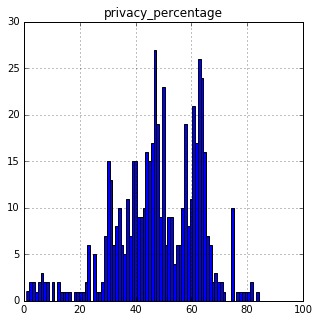

In [59]:
# Distribution of percentages
pd.DataFrame(ur_day_1['privacy_percentage']).hist(bins=100,
                                  range=(1,99.9),
                                  figsize=(5,5))

print( stats.skew(ur_day_1['privacy_percentage']) )

In [60]:
new_ur.columns

Index([u'_acl_x', u'_id_x', u'_kmd_x', u'contexts', u'credit',
       u'credit_can_be', u'credit_gain', u'credit_question',
       u'data_collectors', u'day_no', u'improve', u'privacy_can_be',
       u'privacy_gain', u'privacy_level', u'privacy_percentage', u'sensors',
       u'timestamp', u'user_id', u'_acl_y', u'_id_y', u'_kmd_y', u'acc',
       u'gps', u'light', u'noise', u'_acl_x', u'_id_x', u'_kmd_x',
       u'environment', u'health', u'social_networking', u'transportation',
       u'_acl_y', u'_id_y', u'_kmd_y', u'corp', u'edu', u'gov', u'ngo',
       u'_acl', u'_id', u'_kmd', u'context', u'data_collector', u'sensor'],
      dtype='object')

In [97]:
# merge categorization with (ur) table
new_ur = pd.merge(ur, ps, on='user_id')
new_ur = pd.merge(new_ur, pc, on='user_id')
new_ur = pd.merge(new_ur, pdc, on='user_id')
new_ur = pd.merge(new_ur, pf, on='user_id')
new_ur.columns.values

array([u'_acl_x', u'_id_x', u'_kmd_x', u'contexts', u'credit', u'credit_can_be', u'credit_gain', u'credit_question', u'data_collectors', u'day_no', u'improve', u'privacy_can_be', u'privacy_gain', u'privacy_level', u'privacy_percentage', u'sensors', u'timestamp', u'user_id', u'_acl_y', u'_id_y', u'_kmd_y', u'acc', u'gps', u'light', u'noise', u'_acl_x', u'_id_x', u'_kmd_x', u'environment', u'health', u'social_networking', u'transportation', u'_acl_y', u'_id_y', u'_kmd_y', u'corp', u'edu', u'gov', u'ngo', u'_acl', u'_id', u'_kmd', u'context', u'data_collector', u'sensor'], dtype=object)

In [107]:
c

[u'contexts',
 u'credit',
 u'credit_can_be',
 u'credit_gain',
 u'credit_question',
 u'data_collectors',
 u'day_no',
 u'improve',
 u'privacy_can_be',
 u'privacy_gain',
 u'privacy_level',
 u'privacy_percentage',
 u'sensors',
 u'timestamp',
 u'user_id',
 u'acc',
 u'gps',
 u'light',
 u'noise',
 u'environment',
 u'health',
 u'social_networking',
 u'transportation',
 u'corp',
 u'edu',
 u'gov',
 u'ngo',
 u'_id',
 u'context',
 u'data_collector',
 u'sensor']

In [108]:
new_ur = new_ur[c]

In [109]:
new_ur.columns

Index([u'contexts', u'credit', u'credit_can_be', u'credit_gain',
       u'credit_question', u'data_collectors', u'day_no', u'improve',
       u'privacy_can_be', u'privacy_gain', u'privacy_level',
       u'privacy_percentage', u'sensors', u'timestamp', u'user_id', u'acc',
       u'gps', u'light', u'noise', u'environment', u'health',
       u'social_networking', u'transportation', u'corp', u'edu', u'gov',
       u'ngo', u'_id', u'context', u'data_collector', u'sensor'],
      dtype='object')

In [110]:
pickle.dump(new_ur, open( "ur_pruned.p", "wb" ) )

In [111]:
ur_day_1 = new_ur[new_ur['day_no']==1]

In [112]:
ur_day_1

,contexts,credit,credit_can_be,credit_gain,credit_question,data_collectors,day_no,improve,privacy_can_be,privacy_gain,privacy_level,privacy_percentage,sensors,timestamp,user_id,acc,gps,light,noise,environment,health,social_networking,transportation,corp,edu,gov,ngo,_id,context,data_collector,sensor
0,0,0.211538,0,0.211538,0,0,1,-1,0,0,2,25.000000,0,2016-07-19 11:37:28.474,578decfa334095233266eb2a,2,4,3,2,2,2,3,3,3,2,4,2,578df23080946fe773352ecc,1,3,2
1,1,0.355769,0,0.144231,0,0,1,-1,0,0,3,37.500000,0,2016-07-19 11:37:48.035,578decfa334095233266eb2a,2,4,3,2,2,2,3,3,3,2,4,2,578df23080946fe773352ecc,1,3,2
2,2,0.567308,0,0.211538,0,0,1,-1,0,0,2,33.333333,0,2016-07-19 11:38:14.578,578decfa334095233266eb2a,2,4,3,2,2,2,3,3,3,2,4,2,578df23080946fe773352ecc,1,3,2
3,3,0.765625,0,0.198317,0,0,1,-1,0,0,2,31.250000,0,2016-07-19 11:38:20.209,578decfa334095233266eb2a,2,4,3,2,2,2,3,3,3,2,4,2,578df23080946fe773352ecc,1,3,2
4,0,0.890625,0,0.125000,0,1,1,-1,0,0,3,35.000000,0,2016-07-19 11:38:28.674,578decfa334095233266eb2a,2,4,3,2,2,2,3,3,3,2,4,2,578df23080946fe773352ecc,1,3,2
5,1,1.049279,0,0.158654,0,1,1,-1,0,0,2,33.333333,0,2016-07-19 11:40:08.580,578decfa334095233266eb2a,2,4,3,2,2,2,3,3,3,2,4,2,578df23080946fe773352ecc,1,3,2
6,2,1.221154,0,0.171875,0,1,1,-1,0,0,2,32.142857,0,2016-07-19 11:40:14.246,578decfa334095233266eb2a,2,4,3,2,2,2,3,3,3,2,4,2,578df23080946fe773352ecc,1,3,2
7,3,1.379808,0,0.158654,0,1,1,-1,0,0,2,31.250000,0,2016-07-19 11:42:11.016,578decfa334095233266eb2a,2,4,3,2,2,2,3,3,3,2,4,2,578df23080946fe773352ecc,1,3,2
8,0,1.631010,0,0.251202,0,2,1,-1,0,0,2,30.555556,0,2016-07-19 11:42:32.430,578decfa334095233266eb2a,2,4,3,2,2,2,3,3,3,2,4,2,578df23080946fe773352ecc,1,3,2
9,1,1.868990,0,0.237981,0,2,1,-1,0,0,2,30.000000,0,2016-07-19 11:42:34.846,578decfa334095233266eb2a,2,4,3,2,2,2,3,3,3,2,4,2,578df23080946fe773352ecc,1,3,2
